In [1]:
import pandas as pd
import numpy as np

## Partie 01

In [2]:
df = pd.read_csv("data/employees2.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote
0,0,1,Othmane,NaN,NaN,IT,0,Yes
1,1,2,Ikram,22.0,NaN,HR,23,Yes
2,2,3,Bob,NaN,NaN,HR,26,Yes
3,3,4,Zineb,59.0,73665.0,HR,3,No
4,4,5,David,57.0,59325.0,Finance,33,No


In [4]:
df.dtypes

Unnamed: 0            int64
ID                    int64
Name                 object
Age                 float64
Salary              float64
Department           object
Years_Experience      int64
Remote               object
dtype: object

In [5]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                 49
Salary              44
Department           0
Years_Experience     0
Remote               0
dtype: int64

## Partie 02 

In [6]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [8]:
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Salary', 'Department',
       'Years_Experience', 'Remote'],
      dtype='object')

In [9]:
df["Salary"] = df.groupby("Department")["Salary"].transform(lambda x: x.fillna(x.mean()))

In [10]:
df["Remote"] = df["Remote"].replace({"Yes": "Oui", "No": "Non"})

In [11]:
conditions = [
    (df["Years_Experience"] < 3),
    (df["Years_Experience"].between(3, 7)),
    (df["Years_Experience"].between(8, 15)),
    (df["Years_Experience"] > 15)
]
categories = ["Junior", "Intermediate", "Senior", "Expert"]
df["Seniority_Level"] = np.select(conditions, categories)


In [12]:
df

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,Seniority_Level
0,0,1,Othmane,45.0,69930.000000,IT,0,Oui,Junior
1,1,2,Ikram,22.0,61659.733333,HR,23,Oui,Expert
2,2,3,Bob,45.0,61659.733333,HR,26,Oui,Expert
3,3,4,Zineb,59.0,73665.000000,HR,3,Non,Intermediate
4,4,5,David,57.0,59325.000000,Finance,33,Non,Expert
...,...,...,...,...,...,...,...,...,...
95,95,96,Bob,45.0,82670.000000,Marketing,21,Oui,Expert
96,96,97,Eva,45.0,59838.000000,Finance,12,Non,Senior
97,97,98,Nassim,45.0,45811.000000,Finance,14,Oui,Senior
98,98,99,Nassim,42.0,73800.000000,Marketing,13,Oui,Senior


## Partie 03

In [14]:
df["Salary"].mean()

64504.14296153846

In [15]:
df[df["Salary"] == df["Salary"].max()]

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,Seniority_Level
27,27,28,Jalil,45.0,84685.0,Marketing,28,Oui,Expert


In [16]:
df.groupby("Department")["Salary"].mean()

Department
Finance      57836.583333
HR           61659.733333
IT           69930.000000
Logistics    64544.750000
Marketing    70395.153846
Name: Salary, dtype: float64

In [17]:
df.groupby("Seniority_Level")["Salary"].agg(["mean", "median"])

,mean,median
Seniority_Level,,
Expert,63948.983223,62747.866667
Intermediate,66929.632347,64544.750000
Junior,61558.030769,69930.000000
Senior,65145.745620,65650.375000


In [18]:
df[df["Remote"] == "Oui"].groupby("Department").size()

Department
Finance       7
HR           13
IT            9
Logistics     8
Marketing    18
dtype: int64

## Partie 04

In [19]:
pivot_1 = pd.pivot_table(df, values="Salary", index="Department", columns="Remote", aggfunc="mean")

In [20]:
pivot_1

Remote,Non,Oui
Department,,
Finance,60964.762821,52027.107143
HR,62817.608889,60323.723077
IT,65695.000000,71341.666667
Logistics,65080.750000,64075.750000
Marketing,69812.538462,70621.726496


In [21]:
df

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,Seniority_Level
0,0,1,Othmane,45.0,69930.000000,IT,0,Oui,Junior
1,1,2,Ikram,22.0,61659.733333,HR,23,Oui,Expert
2,2,3,Bob,45.0,61659.733333,HR,26,Oui,Expert
3,3,4,Zineb,59.0,73665.000000,HR,3,Non,Intermediate
4,4,5,David,57.0,59325.000000,Finance,33,Non,Expert
...,...,...,...,...,...,...,...,...,...
95,95,96,Bob,45.0,82670.000000,Marketing,21,Oui,Expert
96,96,97,Eva,45.0,59838.000000,Finance,12,Non,Senior
97,97,98,Nassim,45.0,45811.000000,Finance,14,Oui,Senior
98,98,99,Nassim,42.0,73800.000000,Marketing,13,Oui,Senior


In [30]:
df["Group_Age"] = pd.cut(
    df["Age"],
    bins=[20, 30, 40, 50, 60, 100],
    labels=["20-30", "30-40", "40-50", "50-60", "60+"]
)

In [31]:
pivot_2 = pd.pivot_table(
    df,
    values="Years_Experience",
    index="Group_Age",
    columns="Department",
    aggfunc="mean",
    observed=False
)

In [32]:
pivot_2

Department,Finance,HR,IT,Logistics,Marketing
Group_Age,,,,,
20-30,NaN,22.250000,13.000000,24.666667,18.000000
30-40,28.000000,27.000000,NaN,9.666667,11.500000
40-50,16.571429,14.250000,17.285714,15.666667,21.928571
50-60,19.500000,21.714286,20.000000,20.000000,19.857143


## 

## Partie 05

In [33]:
df["Performance"] = np.where(df["Salary"] < 60000, "Bon",
                      np.where(df["Salary"] < 80000, "Moyen", "Haut"))

In [34]:
conditions = [
    (df["Age"] < 35) & (df["Years_Experience"] < 5),
    (df["Age"] < 35) & (df["Years_Experience"] >= 5),
    (df["Age"] >= 35) & (df["Years_Experience"] < 5),
    (df["Age"] >= 35) & (df["Years_Experience"] >= 5),
]
choices = ["Jeune & Nouveau", "Jeune & Expérimenté", "Senior & Nouveau", "Senior & Expérimenté"]
df["Profil"] = np.select(conditions, choices)

In [41]:
df

,Unnamed: 0,ID,Name,Age,Salary,Department,Years_Experience,Remote,Seniority_Level,Group_Age,Performance,Profil,Ecart_Salaire
0,0,1,Othmane,45.0,69930.000000,IT,0,Oui,Junior,40-50,Moyen,Senior & Nouveau,0.000000
1,1,2,Ikram,22.0,61659.733333,HR,23,Oui,Expert,20-30,Moyen,Jeune & Expérimenté,0.000000
2,2,3,Bob,45.0,61659.733333,HR,26,Oui,Expert,40-50,Moyen,Senior & Expérimenté,0.000000
3,3,4,Zineb,59.0,73665.000000,HR,3,Non,Intermediate,50-60,Moyen,Senior & Nouveau,12005.266667
4,4,5,David,57.0,59325.000000,Finance,33,Non,Expert,50-60,Bon,Senior & Expérimenté,1488.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,96,Bob,45.0,82670.000000,Marketing,21,Oui,Expert,40-50,Haut,Senior & Expérimenté,12274.846154
96,96,97,Eva,45.0,59838.000000,Finance,12,Non,Senior,40-50,Bon,Senior & Expérimenté,2001.416667
97,97,98,Nassim,45.0,45811.000000,Finance,14,Oui,Senior,40-50,Bon,Senior & Expérimenté,-12025.583333
98,98,99,Nassim,42.0,73800.000000,Marketing,13,Oui,Senior,40-50,Moyen,Senior & Expérimenté,3404.846154


In [35]:
df["Ecart_Salaire"] = df["Salary"] - df.groupby("Department")["Salary"].transform("mean")

In [36]:
df["Ecart_Salaire"]

0         0.000000
1         0.000000
2         0.000000
3     12005.266667
4      1488.416667
          ...     
95    12274.846154
96     2001.416667
97   -12025.583333
98     3404.846154
99        0.000000
Name: Ecart_Salaire, Length: 100, dtype: float64

## Partie 06

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

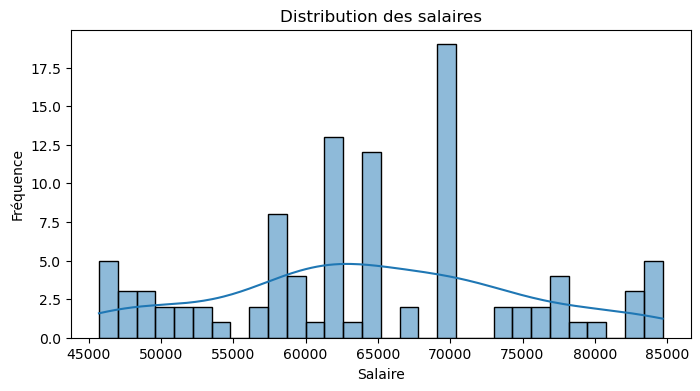

In [39]:
plt.figure(figsize=(8, 4))
sns.histplot(df["Salary"], kde=True, bins=30)
plt.title("Distribution des salaires")
plt.xlabel("Salaire")
plt.ylabel("Fréquence")
plt.show()

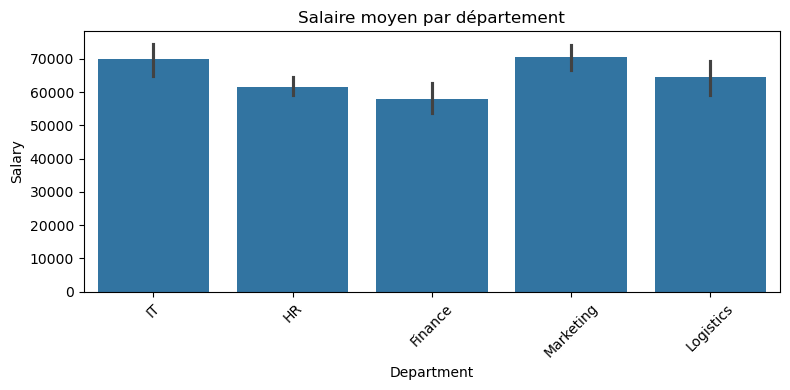

In [40]:
plt.figure(figsize=(8, 4))
sns.barplot(data=df, x="Department", y="Salary", estimator=np.mean)
plt.title("Salaire moyen par département")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

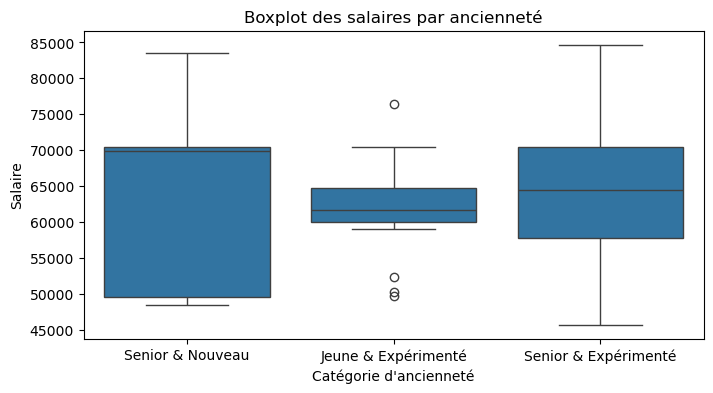

In [42]:
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x="Profil", y="Salary")
plt.title("Boxplot des salaires par ancienneté")
plt.xlabel("Catégorie d'ancienneté")
plt.ylabel("Salaire")
plt.show()